# Python 实现移动平均模型（MA）

## 1. Import Libarary

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

## 

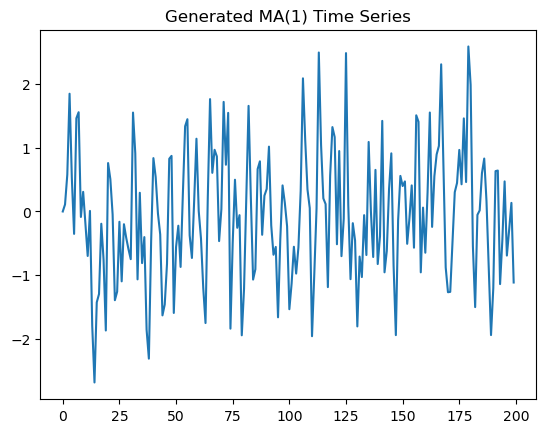

In [2]:
# 设置随机种子以便结果可重复
np.random.seed(42)

# 生成 MA(1) 过程数据
n = 200
theta = 0.5  # 移动平均系数
error = np.random.normal(0, 1, n)  # 生成噪声项
series = np.zeros(n)

# 构建 MA(1) 模型的时间序列
for t in range(1, n):
    series[t] = error[t] + theta * error[t-1]

# 绘制时间序列
plt.plot(series)
plt.title('Generated MA(1) Time Series')
plt.show()

In [4]:
# 构建 MA(1) 模型
model = ARIMA(series, order=(0, 0, 1))

# 拟合模型
model_fit = model.fit()

# 输出模型参数
print('Coefficients:', model_fit.params)

Coefficients: [-0.06360049  0.48519984  0.86110182]


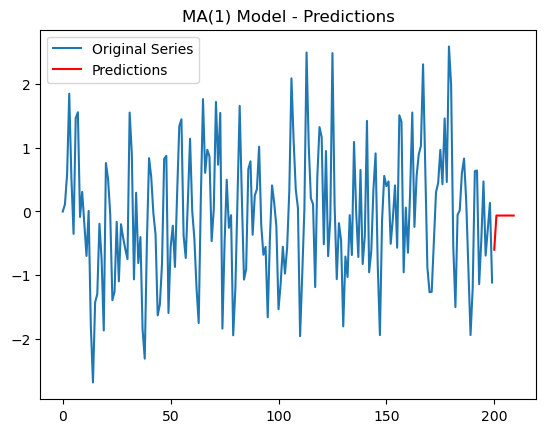

In [5]:
# 预测未来 10 个时间点的值
predictions = model_fit.predict(start=len(series), end=len(series) + 10 - 1, dynamic=False)

# 绘制原始时间序列和预测值
plt.plot(series, label='Original Series')
plt.plot(np.arange(len(series), len(series) + 10), predictions, label='Predictions', color='red')
plt.title('MA(1) Model - Predictions')
plt.legend()
plt.show()